In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("Walmart_Store_sales.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
# Mising Values
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [5]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [6]:
df["Date"]=pd.to_datetime(df["Date"])

In [7]:
df["Day"]=df["Date"].dt.day
df["Month"]=df["Date"].dt.month
df["Year"]=df["Date"].dt.year

In [8]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010


## Which store has maximum sales?

In [9]:
df.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending=False)[:1]

Store
20    3.013978e+08
Name: Weekly_Sales, dtype: float64

### Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

In [10]:
data_std=pd.DataFrame(df.groupby("Store")["Weekly_Sales"].std().sort_values(ascending=False))

In [11]:
data_std.head(1)

,Weekly_Sales
Store,
14,317569.949476


<AxesSubplot: xlabel='Weekly_Sales', ylabel='Density'>

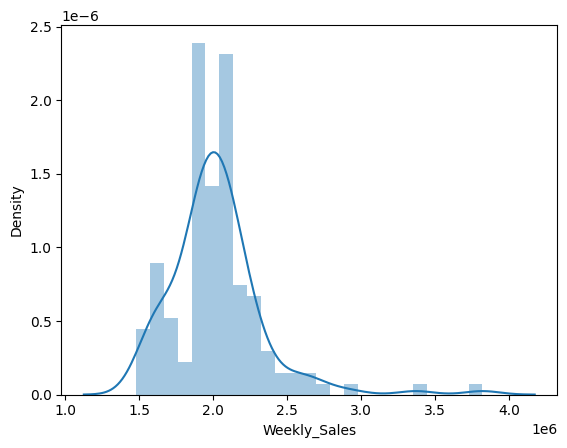

In [12]:
sns.distplot(df[df["Store"]==data_std.head(1)["Weekly_Sales"].index[0]]["Weekly_Sales"], )

In [13]:
coef_of_mean = pd.DataFrame(df.groupby("Store")["Weekly_Sales"].std() /
                            df.groupby("Store")["Weekly_Sales"].mean()).rename(columns=
                                                                               {"Store" : "Store", "Weekly_Sales" : "coef of mean to std"})
coef_of_mean

,coef of mean to std
Store,
1,0.100292
2,0.123424
3,0.115021
4,0.127083
5,0.118668
6,0.135823
7,0.197305
8,0.116953
9,0.126895


In [14]:
coef_of_mean.sort_values(by="coef of mean to std", ascending=False, inplace=True)

In [15]:
coef_of_mean.head(1)

,coef of mean to std
Store,
35,0.229681


<AxesSubplot: xlabel='Weekly_Sales', ylabel='Density'>

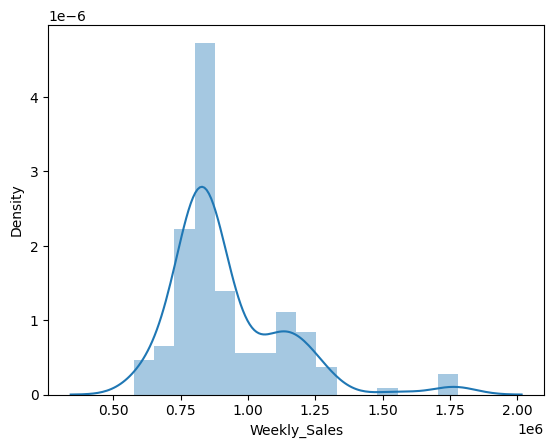

In [16]:
sns.distplot(df[df["Store"]==coef_of_mean.head(1).index[0]]["Weekly_Sales"])

### Which store/s has good quarterly growth rate in Q3’2012

In [17]:
Q3 = df[(df["Date"]>"2012-07-01") & (df["Date"]<"2012-09-30")].groupby("Store")["Weekly_Sales"].sum()

In [18]:
Q2=df[(df["Date"]>"2012-04-01") & (df["Date"]<"2012-06-30")].groupby("Store")["Weekly_Sales"].sum()

In [19]:
print("Store", Q3.idxmax(), "Having the MAximum Growth in Q3, 2012 with", Q3.max())

Store 4 Having the MAximum Growth in Q3, 2012 with 25652119.35


<AxesSubplot: xlabel='Store'>

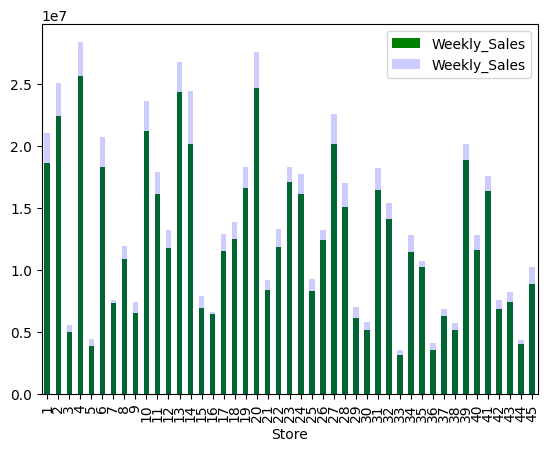

In [20]:
Q2.plot( kind="bar", legend=True, color="b", alpha=0.2, ax=Q3.plot( kind="bar", color="g", legend=True))

### }Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [21]:
Super_Bowl =['12-2-2010', '11-2-2011', '10-2-2012']
Labour_Day =  ['10-9-2010', '9-9-2011', '7-9-2012']
Thanksgiving =  ['26-11-2010', '25-11-2011', '23-11-2012']
Christmas = ['31-12-2010', '30-12-2011', '28-12-2012']

Text(0.5, 0, 'Year')

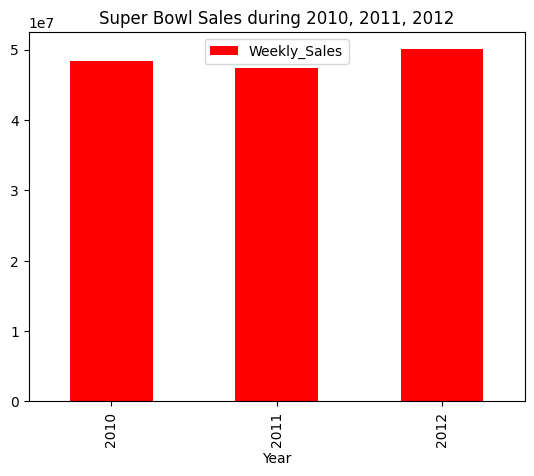

In [22]:
# Yearly Sales
df[df["Date"].isin(Super_Bowl)].groupby("Year")["Weekly_Sales"].sum().plot.bar(legend=True, color="r")
plt.title("Super Bowl Sales during 2010, 2011, 2012")
plt.xlabel("Year")

Text(0.5, 0, 'Year')

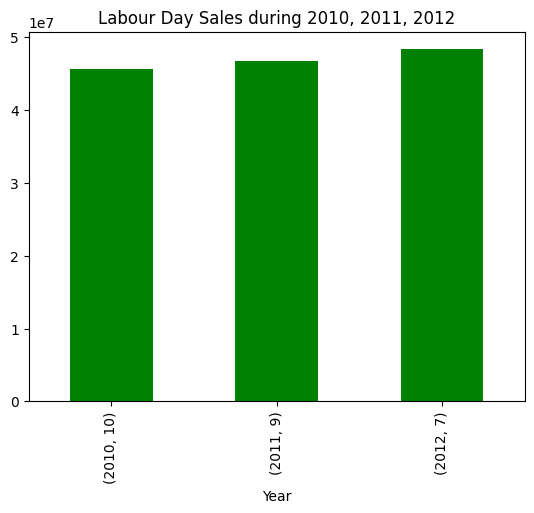

In [23]:
# Monthly Sales of each year
df[df["Date"].isin(Labour_Day)].groupby(["Year", "Month"])["Weekly_Sales"].sum().plot.bar(color="g")
plt.title("Labour Day Sales during 2010, 2011, 2012")
plt.xlabel("Year")

Text(0.5, 0, 'Year')

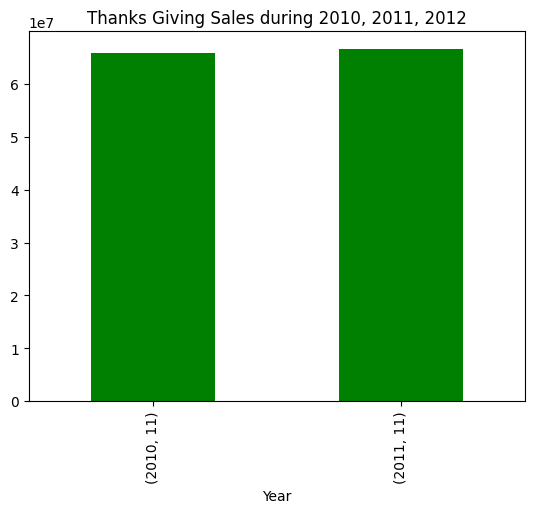

In [24]:
# Monthly Sales of each year
df[df["Date"].isin(Thanksgiving)].groupby(["Year", "Month"])["Weekly_Sales"].sum().plot.bar(color="g")
plt.title("Thanks Giving Sales during 2010, 2011, 2012")
plt.xlabel("Year")

Text(0.5, 0, 'Year')

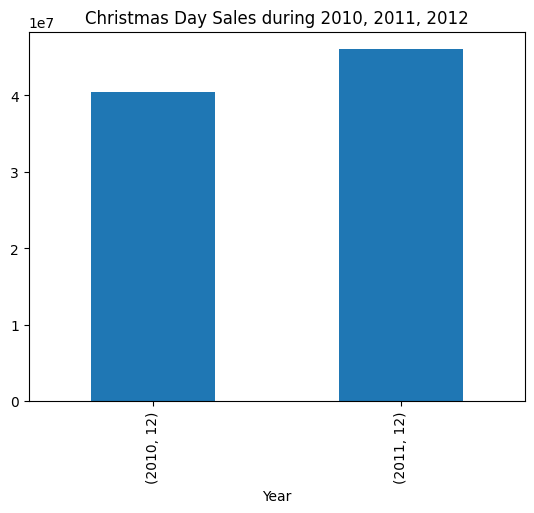

In [25]:
# Monthly Sales of each year
df[df["Date"].isin(Christmas)].groupby(["Year", "Month"])["Weekly_Sales"].sum().plot.bar()
plt.title("Christmas Day Sales during 2010, 2011, 2012")
plt.xlabel("Year")

### Outliers

In [26]:
# Weekly Sales
IQR=np.quantile(df["Weekly_Sales"], 0.75) - np.quantile(df["Weekly_Sales"], 0.25)
lower_sales=np.quantile(df["Weekly_Sales"], 0.25)-1.5*(IQR)
upper_sales = np.quantile(df["Weekly_Sales"], 0.75) + 1.5*(IQR)

In [27]:
# Temprature
IQR=np.quantile(df["Temperature"], 0.75) - np.quantile(df["Temperature"], 0.25)
lower_temp=np.quantile(df["Temperature"], 0.25)-1.5*(IQR)
upper_temp = np.quantile(df["Temperature"], 0.75) + 1.5*(IQR)

In [28]:
# Unwmployment
IQR=np.quantile(df["Unemployment"], 0.75) - np.quantile(df["Unemployment"], 0.25)
lower_unemp=np.quantile(df["Unemployment"], 0.25)-1.5*(IQR)
upper_unemp = np.quantile(df["Unemployment"], 0.75) + 1.5*(IQR)

In [29]:
# We already have less data so we do not drop the outliers instead, we just cap them with the lower and upper limits

In [30]:
df["Weekly_Sales"]=np.where(df["Weekly_Sales"]>upper_sales, upper_sales,
                             np.where(df["Weekly_Sales"]<lower_sales, lower_sales, 
                                     df["Weekly_Sales"]))

In [31]:
df["Temperature"]=np.where(df["Temperature"]>upper_temp, upper_temp,
                             np.where(df["Temperature"]<lower_temp, lower_temp, 
                                     df["Temperature"]))

In [32]:
df["Unemployment"]=np.where(df["Unemployment"]>upper_unemp, upper_unemp,
                             np.where(df["Unemployment"]<lower_unemp, lower_unemp, 
                                     df["Unemployment"]))

In [33]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010


In [34]:
df1=df.copy()

In [35]:
X=df1.drop(columns=["Weekly_Sales", "Date", "Holiday_Flag"])
y=df1.Weekly_Sales

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV 


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

# Linear regression

In [38]:
scale=StandardScaler()

X_train_trans = scale.fit_transform(X_train)
X_test_trans=scale.fit_transform(X_test)

lr=LinearRegression()
lr.fit(X_train_trans, y_train)

yhat=lr.predict(X_test_trans)
yhat1=lr.predict(X_train_trans)

print("Accuracy on Train Data :",(r2_score(y_train, yhat1)*100))
print("Accuracy on Test Data :", (r2_score(y_test, yhat)*100))

Accuracy on Train Data : 13.92697377230987
Accuracy on Test Data : 16.698478917178015


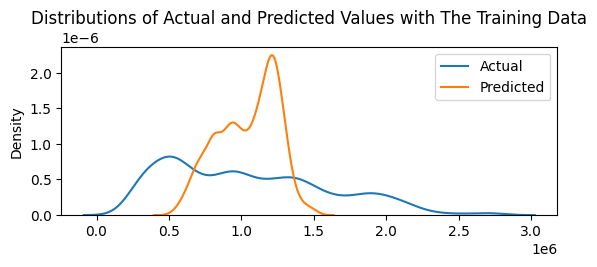

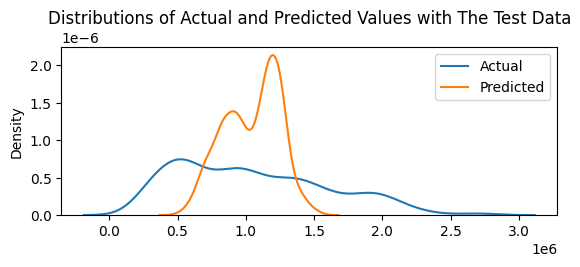

In [39]:
plt.subplot(2,1, 1)
sns.distplot(x=y_train, hist=False)
sns.distplot(x=yhat1, hist=False)
plt.legend(labels=["Actual", "Predicted"])
plt.title("Distributions of Actual and Predicted Values with The Training Data")
plt.show()

plt.subplot(2,1, 2)
sns.distplot(x=y_test, hist=False)
sns.distplot(x=yhat, hist=False)
plt.legend(labels=["Actual", "Predicted"])
plt.title("Distributions of Actual and Predicted Values with The Test Data")
plt.show()

# Random Forest

In [40]:

rf = RandomForestRegressor()        
rf.fit(X_train,y_train)
yhat=rf.predict(X_test)
yhat1=rf.predict(X_train)
print('Accuracy on Test Data:',rf.score(X_test, y_test)*100)
print('Accuracy on Train Data:',rf.score(X_train, y_train)*100)

Accuracy on Test Data: 96.04842332473493
Accuracy on Train Data: 99.42329187936188


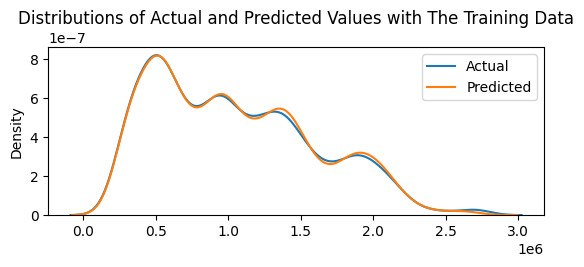

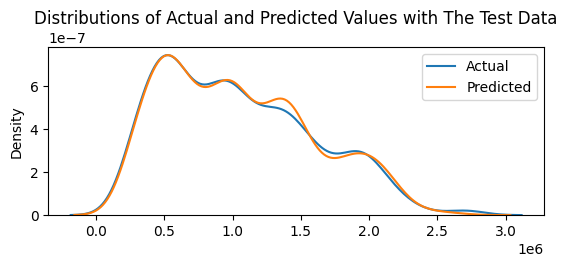

In [41]:
plt.subplot(2,1, 1)
sns.distplot(x=y_train, hist=False)
sns.distplot(x=yhat1,hist=False)
plt.legend(labels=["Actual", "Predicted"])
plt.title("Distributions of Actual and Predicted Values with The Training Data")
plt.show()

plt.subplot(2,1, 2)
sns.distplot(x=y_test,hist=False)
sns.distplot(x=yhat, hist=False)
plt.legend(labels=["Actual", "Predicted"])
plt.title("Distributions of Actual and Predicted Values with The Test Data")
plt.show()